In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
PROJECT_PATH = "D:/ProjectInterPromo/"

In [3]:
data: pd.DataFrame = pd.read_csv(PROJECT_PATH + "data\DONNEES_CONCAT_TLSE-LD/DATA1_COMPLET.csv")

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [4]:
data

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,Date_debut_fraude,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil,localisation
0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,01FEB2021,fìPÅæ,SECTEUR CENTRE,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,NaN,NaN,NaN,NaN,NaN,NaN,NF,0.0,Très peu actifs,toulouse
1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,01MAR2021,aLÄsb,SECTEUR EST,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,60.0,42.0,0.0,0.0,15.0,0.0,FI,1.0,Hyper actifs,toulouse
2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,01MAR2021,Z0ÎuP,SECTEUR SUD,MAIL_OPTOUT,TEL_OPTIN,POR_OPTIN,...,7.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Ma Banque,toulouse
3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,01MAR2021,ëmzXM,SECTEUR NORD,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,6.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Hyper actifs,toulouse
4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,01SEP2020,å3èJ3,SECTEUR CENTRE,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,41.0,13.0,0.0,0.0,9.0,0.0,FI,1.0,Hyper actifs,toulouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849341,835mBEOByTBamgQVgQg771KDA==,1,1,0,NaN,q9åmS,SECTEUR HAUT LGDC COEUR HERAULT,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,1.0,5.0,0.0,0.0,0.0,0.0,NF,1.0,Full digital,languedoc
849342,835rWBxack6OQY9AQFqyqJd5g==,1,1,0,NaN,6lçxa,SECTEUR MAUGUIO MEDITERRANEE,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,68.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Bienvenue,languedoc
849343,835F1MFghZuFjdn+sBHNuQaBw==,1,1,0,NaN,0késÎ,SECTEUR ALES CVN,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,1.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Bienvenue,languedoc
849344,835HAiChYU6Al85Ed4c5I/urw==,1,1,0,NaN,f3QRg,SECTEUR HAUT LGDC COEUR HERAULT,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,4.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Bienvenue,languedoc


In [4]:
def evaluation(pred: np.ndarray, y: np.ndarray, display=True):
    """[summary]

    Args:
        pred (np.ndarray): [description]
    """
    confusion_mat = confusion_matrix(y, pred)
    
    tn, fp, fn, tp = confusion_mat.ravel()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)
    
    if display:
        print("TN / FP \nFN / TP")
        print(confusion_mat)
        print(f"Precision : {precision}")
        print(f"Recall : {recall}")
        print(f"F1_Score : {f1_score}")
    
    return tn, fp, fn, tp

from sklearn.metrics import precision_recall_curve, auc

def evaluation2(score: np.ndarray, y: np.ndarray, display=False):
    precision, recall, thresholds = precision_recall_curve(y, score)
    f1_score = 2 * precision * recall / (precision + recall)
    
    value = auc(recall, precision)
    
    if display:
        print("TN / FP \nFN / TP")
        print(confusion_mat)
        print(f"Precision : {precision}")
        print(f"Recall : {recall}")
        print(f"F1_Score : {f1_score}")
        print(f"AUC : {value}")
    
    return value, f1_score, precision, recall

# value, f1_score, precision, recall = evaluation2(1/distances.mean(axis=1), np.array(data_quanti["TOP_FRAUDE"]))

In [80]:
evaluation(np.random.randint(0, 1, size=len(data)), data["TOP_FRAUDE"])

TN / FP 
FN / TP
[[847728      0]
 [  1618      0]]
Precision : nan
Recall : 0.0
F1_Score : nan


C:\Users\Stior\AppData\Local\Temp/ipykernel_7928/2630847544.py:11: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)


(847728, 0, 1618, 0)

In [8]:
pd.read_csv(PROJECT_PATH + "data/ECHANTILLONS/ECHANTILLON10/echantillon10.csv")

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,Date_debut_fraude,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil,localisation
0,831KFcsZovqRwkmyqAJhBfPGA==,1,1,0,07JUL2020,SÎUVf,SECTEUR OUEST,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,-46.0,130.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Web,toulouse
1,835qrimyjXd7SPpng/cWuEz/w==,1,1,0,NaN,céyaÏ,SECTEUR ALES CVN,MAIL_OPTIN,TEL_OPTIN,POR_OPTOUT,...,7.0,6.0,0.0,0.0,0.0,0.0,QF,1.0,Full digital,languedoc
2,8353Z+loQUqfodVSdCZp3naCg==,1,0,1,NaN,tîêÅÊ,SECTEUR VALLEE DU RHONE,MAIL_OPTOUT,TEL_OPTIN,POR_OPTOUT,...,0.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Peu actifs Ma banque,languedoc
3,831rqXmvv7DhGKOKHAmM/3tGw==,1,0,1,15OCT2020,æËYJ3,SECTEUR OUEST,MAIL_OPTOUT,TEL_OPTIN,POR_OPTOUT,...,2.0,2.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Web modéré,toulouse
4,835M+SkL1tyzkjT6KCrMZlkNg==,1,0,1,NaN,céÎYG,SECTEUR BEZIERS,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,28.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Hyper actifs,languedoc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84930,835Lc+970tiDoDBovevaK4LYA==,0,0,0,NaN,gíÇXN,SECTEUR MONTPELLIER PIC ST LOUP,MAIL_OPTIN,TEL_OPTOUT,POR_OPTIN,...,47.0,5.0,0.0,0.0,0.0,0.0,QF,1.0,Digital Web modéré,languedoc
84931,835a1IzTiIqW+DZI7N0vRVW5A==,0,0,0,NaN,çÊpÀu,SECTEUR NARBONNE,MAIL_NEUTRE,TEL_OPTIN,POR_OPTIN,...,6.0,6.0,0.0,0.0,0.0,0.0,QF,1.0,sans contact,languedoc
84932,835cKBDV4caS5EOVeLxdsRZLQ==,0,0,0,NaN,ïÎkhw,SECTEUR BEZIERS,MAIL_NEUTRE,TEL_OPTIN,POR_NEUTRE,...,8.0,8.0,0.0,0.0,0.0,0.0,FI,1.0,Très peu actifs,languedoc
84933,835CKVu+z3oofUX0nmQlmhgPw==,0,0,0,NaN,ÍlPFE,SECTEUR BEZIERS,MAIL_NEUTRE,TEL_OPTIN,POR_NEUTRE,...,6.0,6.0,0.0,0.0,0.0,0.0,NF,0.0,Très peu actifs,languedoc


In [5]:
data_v0 = pd.read_csv(PROJECT_PATH + "data\sortie\Données_v0\Donnees_V0_NAN_supprimes.csv")

In [7]:
data_v0.sample(1)

,Unnamed: 0,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil,localisation
129685,170727,831h3YcU+Z1T4EO1OPouKwG1w==,0,0,0,å3èJ3,SECTEUR CENTRE,MAIL_OPTOUT,TEL_OPTIN,POR_OPTIN,...,2.0,2.0,0.0,0.0,0.0,0.0,FI,1.0,Peu actifs Ma banque,toulouse


In [6]:
quali_col = []
count = 0
for i, name in zip(data_v0.dtypes, data_v0.columns):
    if i == "object":
        quali_col.append(name)

print(len(data_v0.dtypes))

257


In [7]:
data_quanti = data_v0.drop(columns=quali_col + ["Unnamed: 0"])

In [8]:
data_quanti = data_quanti.sample(100000)

In [9]:
from matplotlib import pyplot as plt
from sklearn import decomposition

In [10]:
pca=decomposition.PCA()
X_pca=pca.fit_transform(data_quanti.drop(columns=["TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"]))

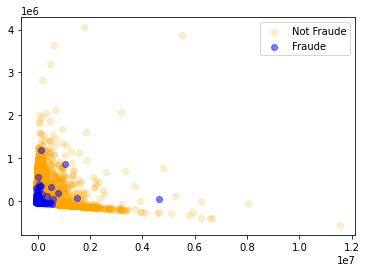

In [11]:
ax = [0, 1]
plt.scatter(X_pca[:,ax[0]][data_quanti["TOP_FRAUDE"]==0], X_pca[:,ax[1]][data_quanti["TOP_FRAUDE"]==0], alpha=0.2, c="orange", label="Not Fraude")
plt.scatter(X_pca[:,ax[0]][data_quanti["TOP_FRAUDE"]==1], X_pca[:,ax[1]][data_quanti["TOP_FRAUDE"]==1], alpha=0.5, c="b", label="Fraude")
plt.legend()
plt.show()

In [11]:
from sklearn.neighbors import NearestNeighbors

In [40]:
clf = NearestNeighbors(n_neighbors=20)
clf.fit(data_quanti.drop(columns=["TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"]))

NearestNeighbors(n_neighbors=20)

In [41]:
distances, indexes = clf.kneighbors(data_quanti.drop(columns=["TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"]))

In [42]:
dst = distances.mean(axis=1)
dst = (dst - dst.min()) / (dst.max() - dst.min())

In [43]:
print(np.unique(dst > 0.03, return_counts=True))
print(np.unique(data_quanti["TOP_FRAUDE"], return_counts=True))

(array([False,  True]), array([99556,   444], dtype=int64))
(array([0, 1], dtype=int64), array([99764,   236], dtype=int64))


In [81]:
evaluation(dst > 0.03, data_quanti["TOP_FRAUDE"])

TN / FP 
FN / TP
[[99322   442]
 [  234     2]]
Precision : 0.0045045045045045045
Recall : 0.00847457627118644
F1_Score : 0.00588235294117647


(99322, 442, 234, 2)

In [135]:
evaluation2(1/distances.mean(axis=1), data_quanti["TOP_FRAUDE"])

C:\Users\Stior\AppData\Local\Temp/ipykernel_7928/3131797713.py:28: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


(0.0018702726173582675,
 array([0.0047159 , 0.00469596, 0.00469601, ...,        nan,        nan,
        0.        ]),
 array([0.00236352, 0.00235353, 0.00235355, ..., 0.        , 0.        ,
        1.        ]),
 array([1.        , 0.99576271, 0.99576271, ..., 0.        , 0.        ,
        0.        ]))

In [125]:
value, f1_score, precision, recall = evaluation2(1/distances.mean(axis=1), np.array(data_quanti["TOP_FRAUDE"]))

C:\Users\Stior\AppData\Local\Temp/ipykernel_7928/3131797713.py:28: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


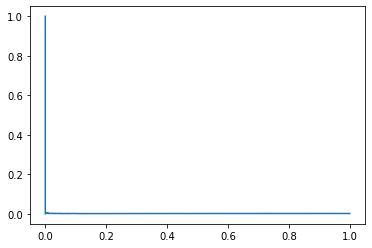

In [20]:
plt.plot(recall, precision)
plt.show()

0.0020454388224921682


C:\Users\Stior\AppData\Local\Temp/ipykernel_6160/3131797713.py:28: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


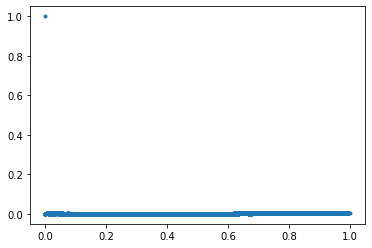

In [19]:
value, f1_score, precision, recall = evaluation2(np.random.rand(len(data_quanti)), data_quanti["TOP_FRAUDE"])
print(value)
plt.plot(recall, precision, ".")
plt.show()

In [16]:
thresholds

array([0.00509257, 0.00509519, 0.005105  , ..., 0.99997589, 0.99998813,
       0.9999999 ])